In [2]:
!pip install tensorflow
!pip install numpy
!pip install matplotlib
!pip install pandas


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing liberies

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

# loading the Dataset

In [5]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step


# Viewing the Data and its Shape

In [9]:
print("size of Training Dataset is : ",len(X_train))
print("size of Testing Dataset is : ",len(X_test))
print("shape of Training Dataset is : ",X_train.shape)
print("shape of Testing Dataset is : ",X_test.shape)
print("shape of Training Labels is : ",y_train.shape)
print("shape of Testing Labels is : ",y_test.shape)
# print("X_train looks like : ",X_train)
print("y_train looks like : ",y_train)

size of Training Dataset is :  60000
size of Testing Dataset is :  10000
shape of Training Dataset is :  (60000, 28, 28)
shape of Testing Dataset is :  (10000, 28, 28)
shape of Training Labels is :  (60000,)
shape of Testing Labels is :  (10000,)
y_train looks like :  [5 0 4 ... 5 6 8]


# Image in form of matrix

In [10]:
print("single image looks like: ",X_train[0])

single image looks like:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 

# Ploting the image matrix

the actual number is :  5


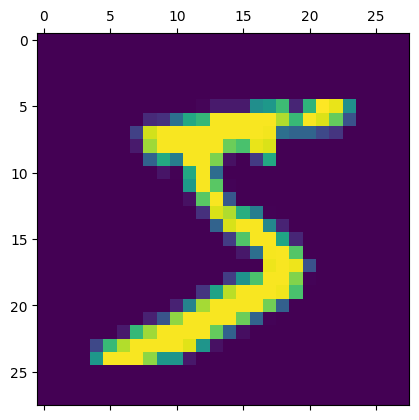

In [11]:
plt.matshow(X_train[0])
print("the actual number is : ",y_train[0])

# Flatten Image from 28*28 to 784

In [12]:
X_train_shape = X_train.shape
X_test_shape = X_test.shape

print("shape  \t|Before\t\t    | After:")
X_train_flattened = X_train.reshape(len(X_train), 28*28)
print("X_train |",X_train.shape,"  |\t",X_train_flattened.shape)

X_test_flattened = X_test.reshape(len(X_test), 28*28)
print("X_test  |",X_test.shape,"  |\t",X_test_flattened.shape)

shape  	|Before		    | After:
X_train | (60000, 28, 28)   |	 (60000, 784)
X_test  | (10000, 28, 28)   |	 (10000, 784)


# Individual image shape

In [13]:
print("single image looks like: ",X_train_flattened[0].shape)
print("and there are 60,000 images in the X_train_flattened")

single image looks like:  (784,)
and there are 60,000 images in the X_train_flattened


# Train Basic Model

In [14]:
Basic_Model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

Basic_Model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
Basic_Model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5


C:\Users\Atul\OneDrive\Desktop\ML projects\tf-env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 856us/step - accuracy: 0.3942 - loss: 17.5004
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 864us/step - accuracy: 0.4078 - loss: 6.0249
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 849us/step - accuracy: 0.3876 - loss: 5.5181
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 846us/step - accuracy: 0.3913 - loss: 5.3779
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.3746 - loss: 5.1056


# we have not scalled the X_tarin thus we are getting accuracy of only about 40%. lets scale and train another model :

In [15]:

# scalled between 0 and 1 by dividing all entries by 255
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# new X_train flattern 
X_train_flattened = X_train_scaled.reshape(len(X_train_scaled), 28*28)
X_test_flattened = X_test_scaled.reshape(len(X_test_scaled), 28*28)

# traning new model 
Scaled_Model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

Scaled_Model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
Scaled_Model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 882us/step - accuracy: 0.8036 - loss: 0.7381
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 866us/step - accuracy: 0.9139 - loss: 0.3029
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 945us/step - accuracy: 0.9182 - loss: 0.2899
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 848us/step - accuracy: 0.9246 - loss: 0.2712
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - accuracy: 0.9272 - loss: 0.2674


# accuracy of the scalled model is significantely higher

In [16]:
print("accuracy of Basic_Model is :" ,Basic_Model.evaluate(X_test_flattened, y_test)[1])
print("accuracy of Scaled_Model is :", Scaled_Model.evaluate(X_test_flattened, y_test)[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.4664 - loss: 1.6419
accuracy of Basic_Model is : 0.5022000074386597
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.9150 - loss: 0.3024
accuracy of Scaled_Model is : 0.9247000217437744


# lets Predict !

the actual number is :  7
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step
Predicted number is : 7


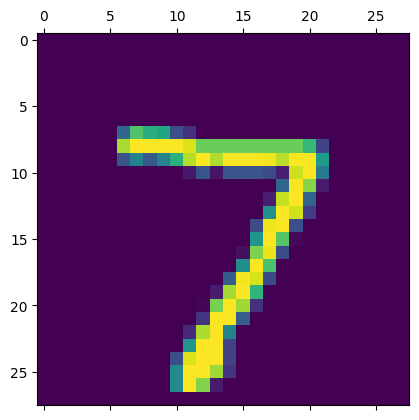

In [17]:
plt.matshow(X_test[0])
print("the actual number is : ",y_test[0])
y_predicted = Scaled_Model.predict(X_test_flattened)
# print("Probability array :",y_predicted[0])
print("Predicted number is :",np.argmax(y_predicted[0]))

# Confusion Matrix for basic model

tf.Tensor(
[[ 959    0    1    2    0    5    8    3    2    0]
 [   0 1113    3    2    0    1    4    2   10    0]
 [   7   11  907   29    8    5   13   12   38    2]
 [   2    0   12  937    0   18    3   12   19    7]
 [   1    1    2    2  914    0   12    4   10   36]
 [   8    2    2   41   11  775   15    5   27    6]
 [  10    3    3    2    7   11  918    2    2    0]
 [   1    5   21    8    5    0    0  960    2   26]
 [   7    8    6   32    9   31   10   12  851    8]
 [  10    7    1   13   27    8    0   26    4  913]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

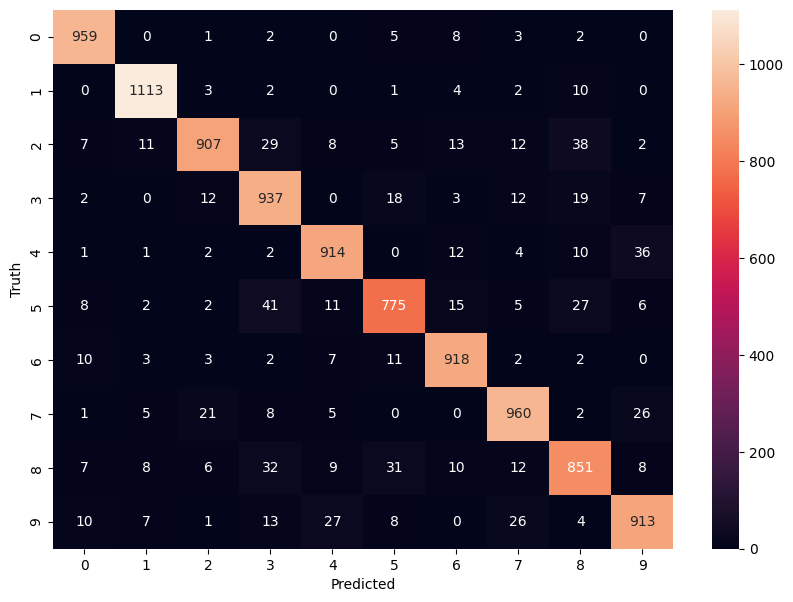

In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
conf_mat = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
print(conf_mat)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Traning model with hidden layer

In [22]:
# traning new model 
layered_Model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

layered_Model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
layered_Model.fit(X_train_flattened, y_train, epochs=5)

C:\Users\Atul\OneDrive\Desktop\ML projects\tf-env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8741 - loss: 0.4512
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9600 - loss: 0.1372
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9727 - loss: 0.0890
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9792 - loss: 0.0664
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9843 - loss: 0.0493


# Evalvating all the models together in tabular form

In [23]:

# Evaluate all models: returns [loss, accuracy]
basic_loss, basic_acc = Basic_Model.evaluate(X_test_flattened, y_test, verbose=0)
scaled_loss, scaled_acc = Scaled_Model.evaluate(X_test_flattened, y_test, verbose=0)
layered_loss, layered_acc = layered_Model.evaluate(X_test_flattened, y_test, verbose=0)

# Print table header
print(f"{'Model Name':<20} {'Loss':<10} {'Accuracy':<10}")
print("-" * 42)

# Print each model's evaluation
print(f"{'Basic_Model':<20} {basic_loss:<10.4f} {basic_acc:<10.4f}")
print(f"{'Scaled_Model':<20} {scaled_loss:<10.4f} {scaled_acc:<10.4f}")
print(f"{'Layered_Model':<20} {layered_loss:<10.4f} {layered_acc:<10.4f}")


Model Name           Loss       Accuracy  
------------------------------------------
Basic_Model          1.5989     0.5022    
Scaled_Model         0.2672     0.9247    
Layered_Model        0.0766     0.9763    


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step


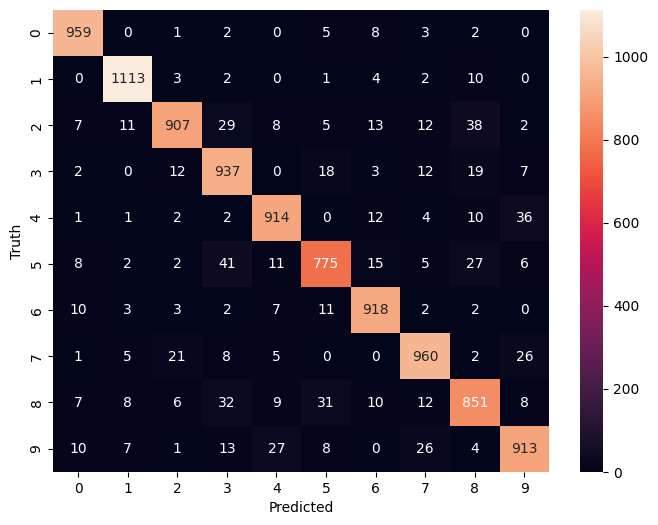

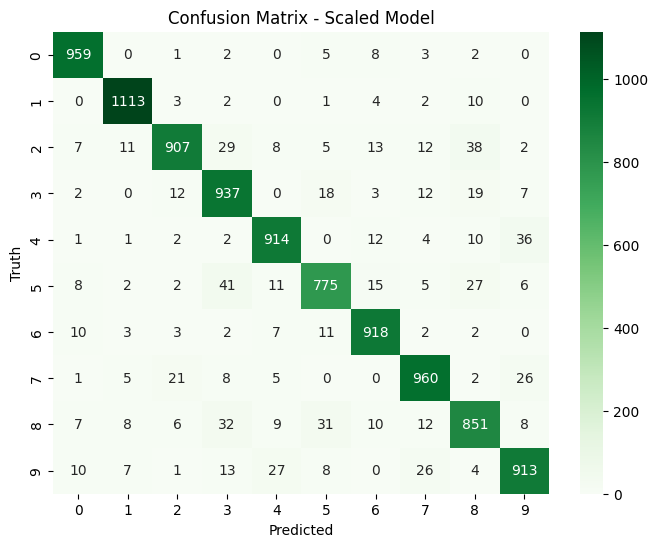

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step


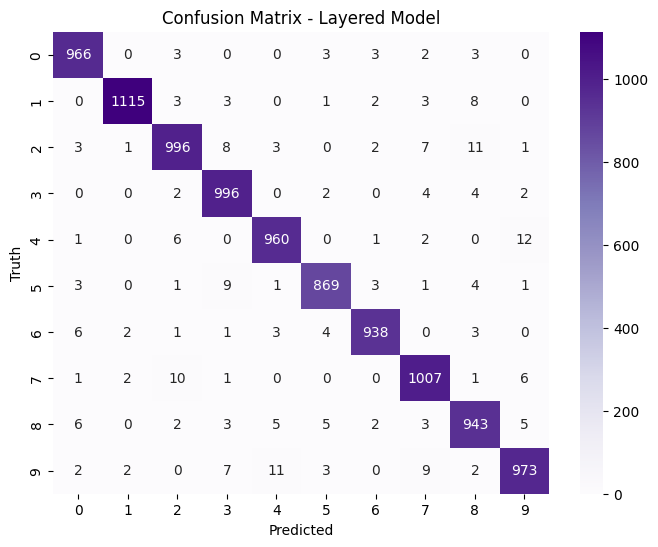

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf

# BASIC MODEL
plt.figure(figsize = (8,6))
sn.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# SCALED MODEL
y_pred_scaled = Scaled_Model.predict(X_test_flattened)
y_pred_scaled_labels = [np.argmax(i) for i in y_pred_scaled]
conf_mat_scaled = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_scaled_labels)

plt.figure(figsize=(8,6))
sn.heatmap(conf_mat_scaled, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Scaled Model")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# LAYERED MODEL
y_pred_layered = layered_Model.predict(X_test_flattened)
y_pred_layered_labels = [np.argmax(i) for i in y_pred_layered]
conf_mat_layered = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_layered_labels)

plt.figure(figsize=(8,6))
sn.heatmap(conf_mat_layered, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Layered Model")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


# conclusion 

## the layered model is performing better because of the layer and scalling .